In [1]:
from sgcc_model11 import *
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import numpy as np

In [2]:
param_bounds = {
    "fts": [50, 200], # Frequency-time slope: controls how coarse-to-fine a dLGN unit response is.
    "t": [70, 90], # Time intercept parameter: onset time of the lowest SF response.
    "fas": [-.5, -.5], # Frequency-amplitude slope: controls the decay of response amplitude with SF.
    "a": [1, 1], # Amplitude intercept parameter: initial amplitude of the lowest SF response.
    "d": [20, 40], # Response duration: duration of the dLGN uni response.
    "inh_d": [30, 30], # Inhibition delay: temporal delay between the excitatory and inhibitory V1 components.
    "inh_w": [1.2, 1.2], # Inhibition weight: gain parameter for the inhibitory V1 component.
}

In [3]:
model = SGCCircuit(param_bounds)
model.initialize_random_parameters(n_lgn=3, n_v1=1, n_sample=1)

In [4]:
X = tf.convert_to_tensor([0.02,0.32], dtype = tf.float32)

In [5]:
Y = model.predict(X)

(0.0, 1.5)

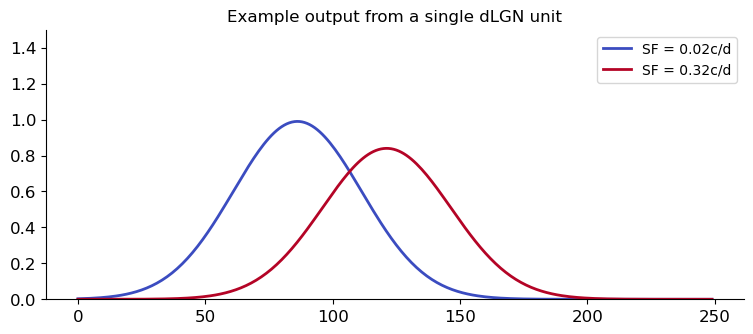

In [6]:
cmap = plt.get_cmap('coolwarm') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 2)))
fig, ax = plt.subplots(1, figsize = (9,3.5))
ax.plot(model.dlgn_exc[0,0,0,0,:].numpy().T, label = 'SF = 0.02c/d', linewidth = 2)
ax.plot(model.dlgn_exc[0,0,0,1,:].numpy().T, label = 'SF = 0.32c/d', linewidth = 2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.tick_params(labelsize = 12)
ax.set_title("Example output from a single dLGN unit")
ax.set_ylim(0,1.5)
# plt.savefig('sgcc_single_dlgn_out.svg', transparent = False, facecolor = 'white',
#            bbox_inches = 'tight', dpi = 300)

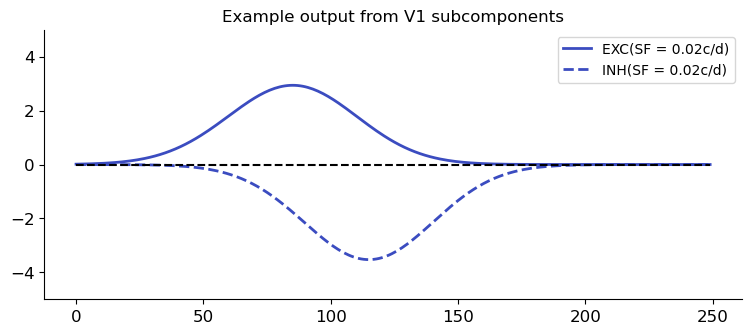

In [ ]:
cmap = plt.get_cmap('coolwarm') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 2)))
fig, ax = plt.subplots(1, figsize = (9,3.5))
ax.plot(model.v1_exc[0,0,0,:].numpy().T, label = 'EXC(SF = 0.02c/d)', linewidth = 2, color = cmap(np.linspace(0, 1, 2))[0])

ax.plot(-model.v1_inh[0,0,0,:].numpy().T, '--', label = 'INH(SF = 0.02c/d)', linewidth = 2, color = cmap(np.linspace(0, 1, 2))[0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.tick_params(labelsize = 12)
ax.set_title("Example output from V1 subcomponents")
ax.set_ylim(-5,5)
ax.plot([0]*250, '--', color = 'black')
# plt.savefig('sgcc_v1_comp_out.svg', transparent = False, facecolor = 'white',
#            bbox_inches = 'tight', dpi = 300)

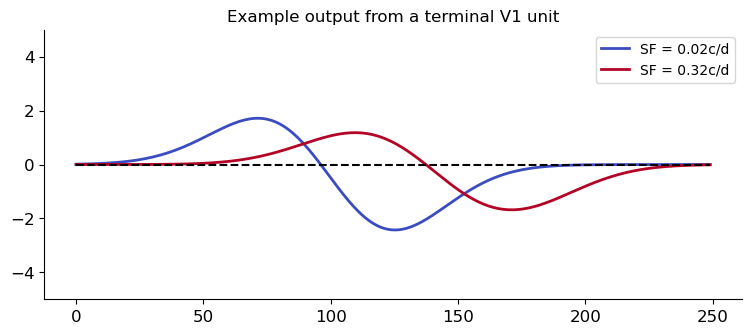

In [9]:
cmap = plt.get_cmap('coolwarm') 
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 2)))
fig, ax = plt.subplots(1, figsize = (9,3.5))

for i, sf in enumerate([0.02, 0.32]):
    ax.plot(Y[0,0, i].numpy().T, label = f'SF = {sf}c/d', linewidth = 2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.tick_params(labelsize = 12)
ax.set_title("Example output from a terminal V1 unit")
ax.set_ylim(-5,5)
ax.plot([0]*250, '--', color = 'black')
# plt.savefig('sgcc_v1_term_out.png', transparent = False, facecolor = 'white',
#            bbox_inches = 'tight', dpi = 300)